# Prediksi Penyakit Jantung Menggunakan Machine Learning

**Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian**

-Ringkasan

Penyakit jantung menjadi salah satu penyebab kematian utama di dunia. Deteksi dini terhadap faktor risiko sangat penting agar pencegahan dan penanganan dapat dilakukan lebih awal. Project ini bertujuan membangun sistem prediksi penyakit jantung menggunakan algoritma Machine Learning berdasarkan data medis pasien seperti usia, tekanan darah, kolesterol, dan detak jantung maksimum.

-Permasalahan

Bagaimana memanfaatkan data medis untuk membangun model prediksi penyakit jantung yang akurat dan dapat membantu tenaga medis dalam proses screening pasien?

-Tujuan

Membangun model prediktif berbasis Machine Learning.

Mengetahui fitur yang paling berpengaruh terhadap prediksi penyakit jantung.

Membandingkan beberapa model dan memilih yang terbaik.

Link Dataset (asli dari Kaggle)
🔗 https://www.kaggle.com/datasets/ybifoundation/heart-disease-prediction

-Alur Penyelesaian:

plaintext
Copy
Edit
[Dataset] → [EDA & Praproses] → [Modeling] → [Evaluasi Model] → [Kesimpulan]


**Penjelasan Dataset, EDA, dan Feature Engineering**

-Dataset

Dataset yang digunakan memiliki 14 kolom fitur dan 1 target (target) dengan nilai 1 (positif penyakit jantung) dan 0 (negatif/tidak ada penyakit).

-Fitur utama:

age: Usia pasien

sex: Jenis kelamin (1 = Pria, 0 = Wanita)

cp: Tipe nyeri dada

trestbps: Tekanan darah saat istirahat

chol: Kadar kolesterol

fbs: Gula darah > 120 mg/dl

restecg: Hasil EKG saat istirahat

thalach: Detak jantung maksimum

exang: Angina karena olahraga

oldpeak: Depresi ST setelah olahraga

slope, ca, thal: Informasi tambahan dari hasil tes

EDA:

Cek distribusi target

Visualisasi korelasi fitur

Deteksi outlier dan missing value

Feature Engineering:

One-Hot Encoding untuk cp, thal, slope

Normalisasi/standarisasi jika dibutuhkan

Split data menjadi training dan testing set


**Proses Learning / Modeling**

-
Model yang digunakan:

Logistic Regression

Random Forest Classifier
(Opsi tambahan: SVM, KNN, XGBoost jika ingin eksplorasi lebih lanjut)

-Langkah-langkah:

Pisahkan fitur dan target

Bagi data: 80% training, 20% testing

Latih model dan lakukan prediksi

Evaluasi performa model

**Performa Model**

-Metrik evaluasi yang digunakan:

Accuracy

Precision

Recall

F1-score

Hasil awal menunjukkan bahwa Random Forest memiliki performa lebih baik dibanding Logistic Regression, khususnya dalam akurasi dan stabilitas prediksi.

**Diskusi dan Kesimpulan**

-Diskusi:

Model dapat digunakan untuk membantu proses skrining penyakit jantung.

Fitur seperti cp, thalach, dan oldpeak sangat berpengaruh terhadap hasil prediksi.

Tidak terdapat missing value sehingga preprocessing lebih sederhana.

-Kesimpulan:

Machine Learning dapat dimanfaatkan untuk deteksi awal risiko penyakit jantung.

Random Forest menghasilkan performa yang baik untuk klasifikasi biner ini.

Potensi pengembangan lebih lanjut: menggunakan lebih banyak data dan fitur klinis tambahan.

In [3]:
# EDA dan Plot library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# agar hasil visualisasi bisa langsung tercetak di Jupyter Notebook
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluasi Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
from google.colab import files
uploaded = files.upload()



Saving heart.csv to heart (1).csv


In [12]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
df["target"].value_counts().sort_values(ascending=True)

,count
target,
0,138
1,165


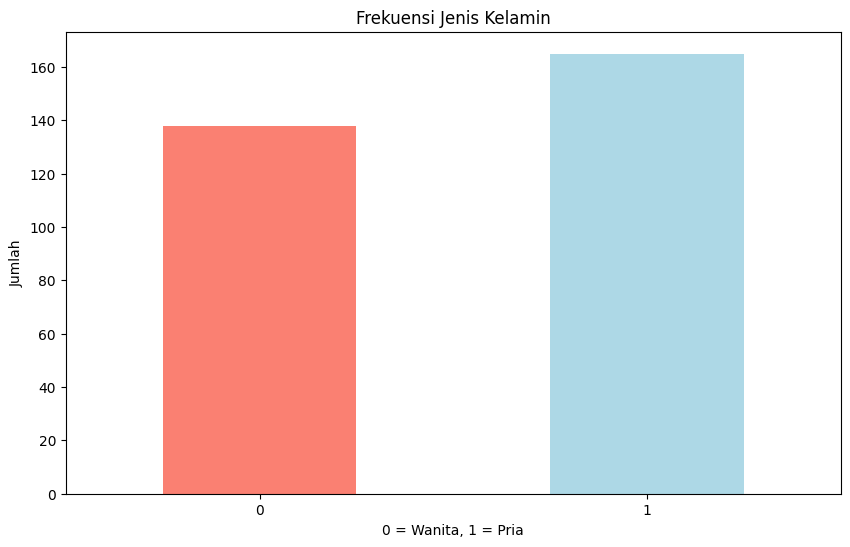

In [16]:
df["target"].value_counts().sort_values(ascending=True).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

plt.title("Frekuensi Jenis Kelamin")
plt.xlabel("0 = Wanita, 1 = Pria")
plt.ylabel("Jumlah")
plt.xticks(rotation=0);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [19]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [21]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


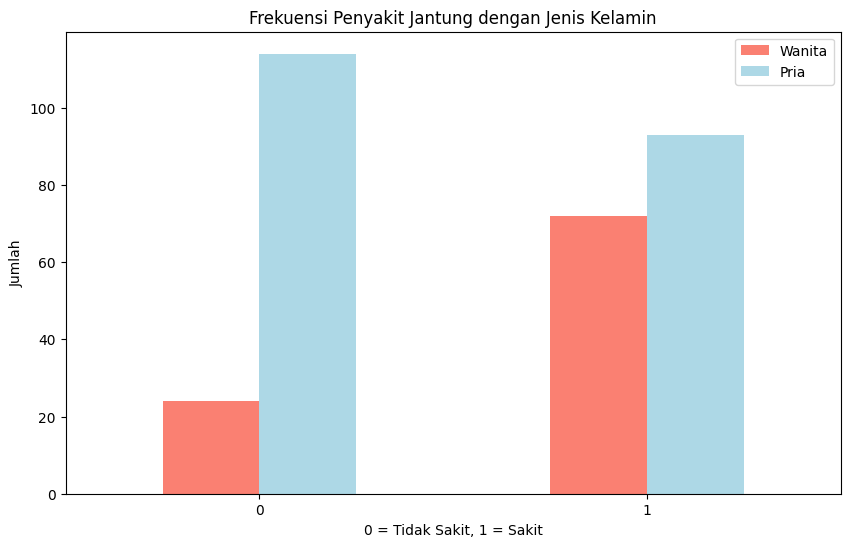

In [22]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Frekuensi Penyakit Jantung dengan Jenis Kelamin");
plt.xlabel("0 = Tidak Sakit, 1 = Sakit");
plt.ylabel("Jumlah");
plt.legend(["Wanita", "Pria"]);
plt.xticks(rotation=0);

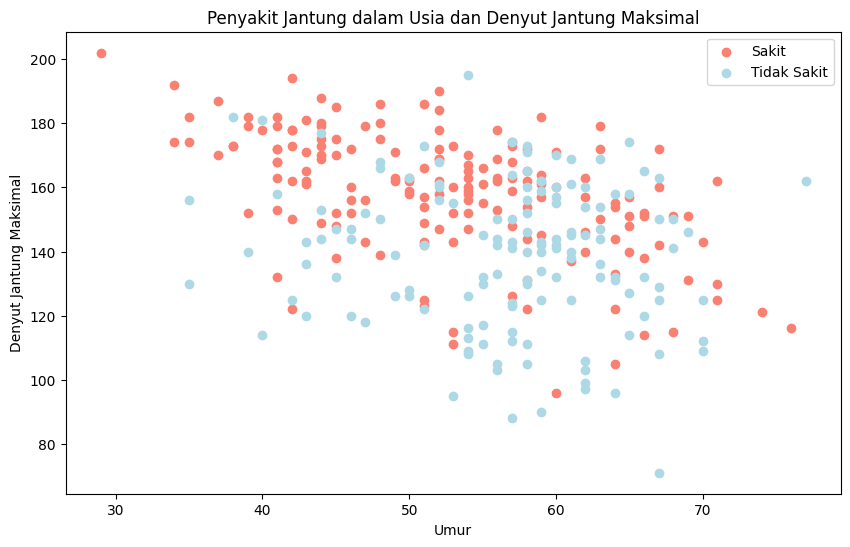

In [23]:
plt.figure(figsize=(10, 6))

# scatter
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Penyakit Jantung dalam Usia dan Denyut Jantung Maksimal")
plt.xlabel("Umur")
plt.ylabel("Denyut Jantung Maksimal")
plt.legend(["Sakit", "Tidak Sakit"]);

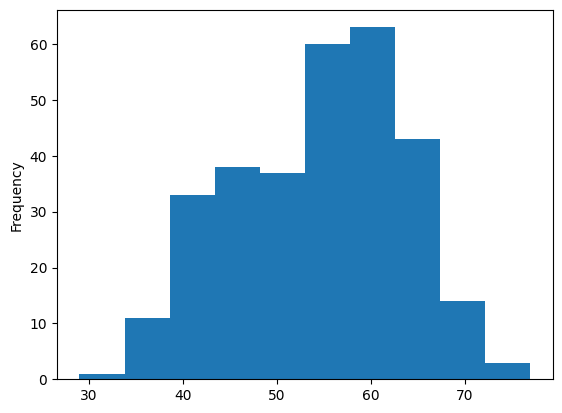

In [24]:
df.age.plot.hist();

In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


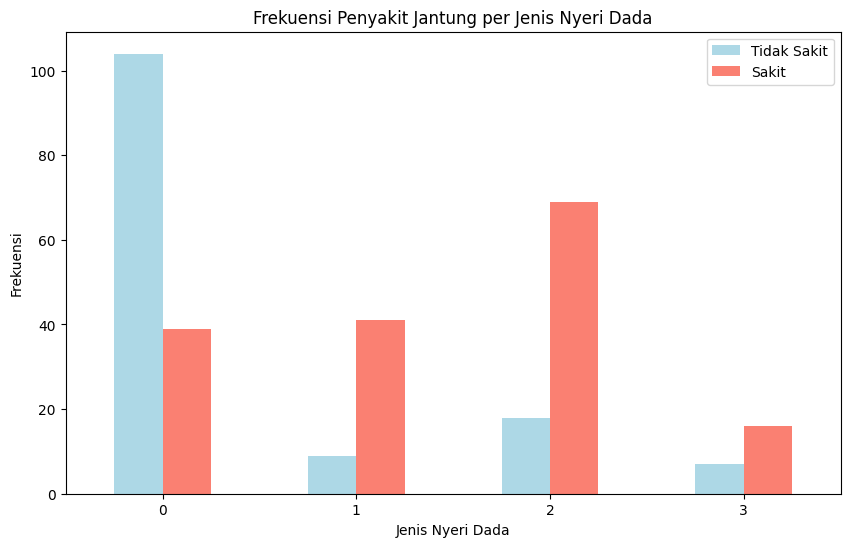

In [26]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"])

plt.title("Frekuensi Penyakit Jantung per Jenis Nyeri Dada")
plt.xlabel("Jenis Nyeri Dada")
plt.ylabel("Frekuensi")
plt.legend(["Tidak Sakit", "Sakit"])
plt.xticks(rotation=0);


In [27]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


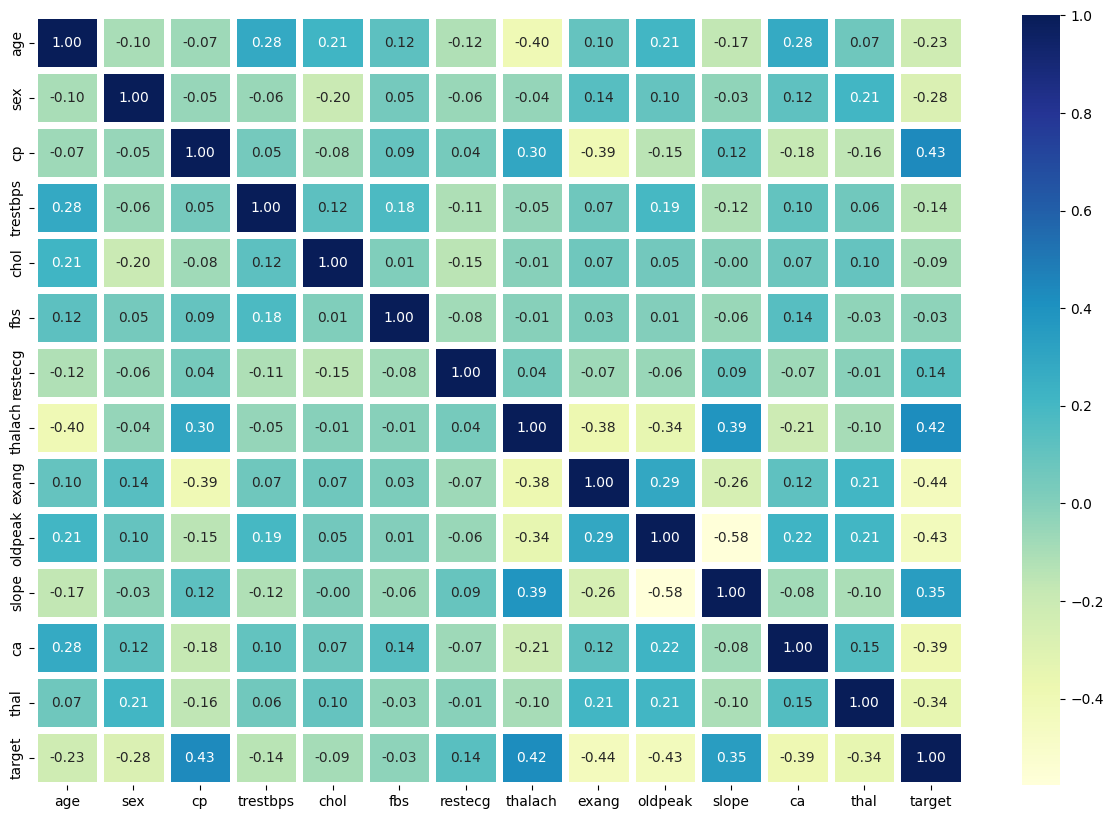

In [28]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=5,
            fmt=".2f",
            cmap="YlGnBu");

In [29]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
X = df.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
y = df.target.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
np.random.seed(8)

In [33]:
for i in range(5):
    np.random.seed(8)
    print(np.random.randint(1, 1000))

452
452
452
452
452


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2


In [36]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2


In [37]:
y_train, len(y_train)

(array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 242)

In [38]:
y_test, len(y_test)

(array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 61)

In [39]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Menyesuaikan dan mengevaluasi model machine learning.
    models: dictionary dari model pembelajaran mesin Scikit-Learn yang berbeda.
    X_train: training data
    X_test: testing data
    y_train: label yang terkait dengan data pelatihan
    y_test: label yang terkait dengan data testing
    """
    np.random.seed(8)
    # Membuat dictionary untuk menyimpan skor model
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [40]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8524590163934426}

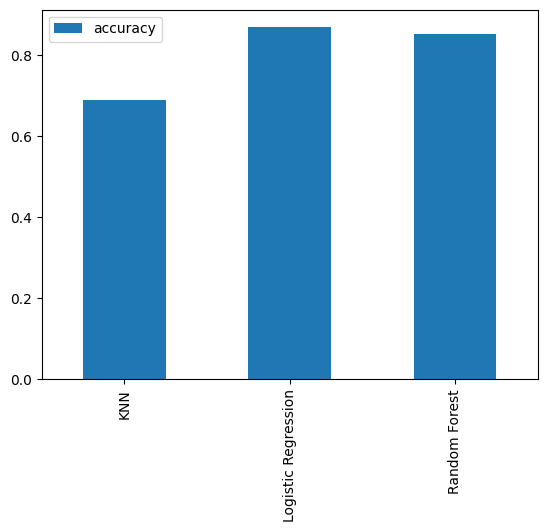

In [41]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [42]:
# List train scores
train_scores = []

# List test scores
test_scores = []

# Mencoba beberapa nilai n
neighbors = range(1,21)

# algoritma
knn = KNeighborsClassifier()
# Loop
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)

    # Update scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [43]:
train_scores

[1.0,
 0.8057851239669421,
 0.7933884297520661,
 0.768595041322314,
 0.7644628099173554,
 0.7520661157024794,
 0.731404958677686,
 0.7148760330578512,
 0.7107438016528925,
 0.6859504132231405,
 0.6942148760330579,
 0.6735537190082644,
 0.6942148760330579,
 0.6735537190082644,
 0.6694214876033058,
 0.6570247933884298,
 0.6652892561983471,
 0.6611570247933884,
 0.6528925619834711,
 0.6611570247933884]

In [44]:
test_scores

[0.639344262295082,
 0.4426229508196721,
 0.6229508196721312,
 0.6229508196721312,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327]

Nilai KNN tertinggi pada data test: 68.85%


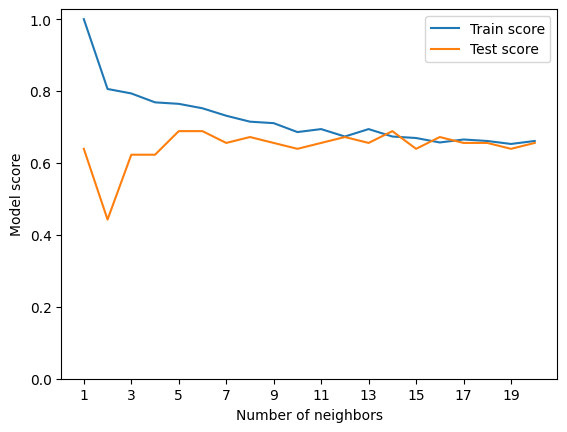

In [45]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.ylim(ymin=0)
plt.legend()

print(f"Nilai KNN tertinggi pada data test: {max(test_scores)*100:.2f}%")

In [46]:
# Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [47]:
np.random.seed(8)

#LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [49]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [50]:
np.random.seed(8)

#RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rs_rfc.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [51]:
rs_rfc.best_params_

{'n_estimators': np.int64(810),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(3),
 'max_depth': 3}

In [52]:
rs_rfc.score(X_test, y_test)

0.9016393442622951

In [53]:
np.random.seed(8)

#LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
gs_log_reg.best_params_

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [55]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [56]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [57]:
y_test

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

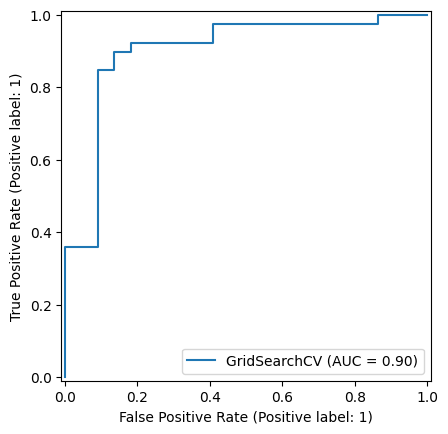

In [59]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [60]:
print(confusion_matrix(y_test, y_preds))

[[20  2]
 [ 6 33]]


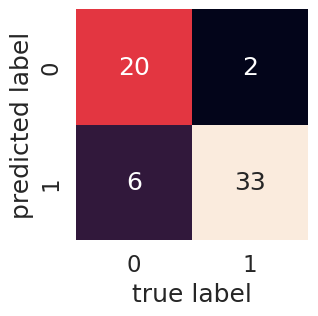

In [61]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



In [63]:
gs_log_reg.best_params_

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [64]:
clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

In [65]:
# Accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.85245902, 0.85245902, 0.85      , 0.71666667])

In [66]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8182513661202186)

In [67]:
# Precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8122549019607843)

In [68]:
# Recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

np.float64(0.8727272727272727)

In [69]:
# F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

np.float64(0.8404818247075424)

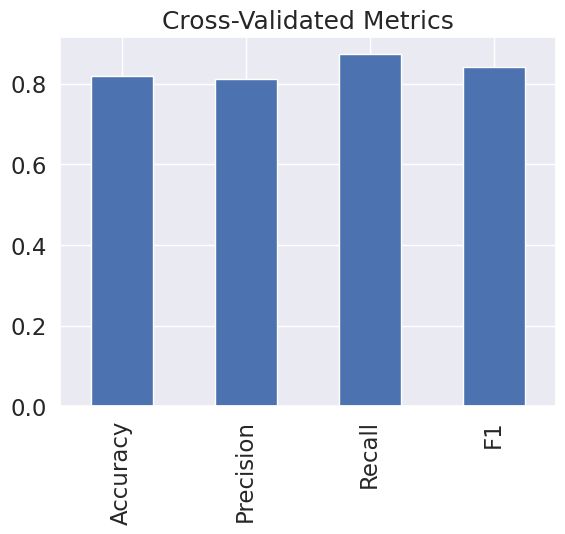

In [70]:
# Visualizing
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);